<a href="https://colab.research.google.com/github/lingfang23/BCG-Virtual-Exp-Program/blob/main/BCG_PowerCo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
price = pd.read_csv('/content/drive/MyDrive/Work_sample/BCG Virtual Program/price_data.csv')
client = pd.read_csv('/content/drive/MyDrive/Work_sample/BCG Virtual Program/client_data.csv')

In [40]:
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [41]:
client.shape

(14606, 26)

In [42]:
client['date_activ'] = pd.to_datetime(client['date_activ'])
earliest_date = client['date_activ'].min()
latest_date = client['date_activ'].max()

# Calculate the duration between the earliest and latest dates
duration = latest_date - earliest_date

print("Star date Period")
print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")
print(f"Duration: {duration}")
print("\n")

client['date_end'] = pd.to_datetime(client['date_end'])
earliest_date = client['date_end'].min()
latest_date = client['date_end'].max()

# Calculate the duration between the earliest and latest dates
duration = latest_date - earliest_date

print("End date Period")
print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")
print(f"Duration: {duration}")
print("\n")

client['date_renewal'] = pd.to_datetime(client['date_renewal'])
earliest_date = client['date_renewal'].min()
latest_date = client['date_renewal'].max()

# Calculate the duration between the earliest and latest dates
duration = latest_date - earliest_date

print("Renewal Period")
print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")
print(f"Duration: {duration}")

Star date Period
Earliest date: 2003-05-09 00:00:00
Latest date: 2014-09-01 00:00:00
Duration: 4133 days 00:00:00


End date Period
Earliest date: 2016-01-28 00:00:00
Latest date: 2017-06-13 00:00:00
Duration: 502 days 00:00:00


Renewal Period
Earliest date: 2013-06-26 00:00:00
Latest date: 2016-01-28 00:00:00
Duration: 946 days 00:00:00


In [43]:
price['price_date'] = pd.to_datetime(price['price_date'])
earliest_date =price['price_date'].min()
latest_date = price['price_date'].max()

# Calculate the duration between the earliest and latest dates
duration = latest_date - earliest_date

print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")
print(f"Duration: {duration}")

Earliest date: 2015-01-01 00:00:00
Latest date: 2015-12-01 00:00:00
Duration: 334 days 00:00:00


In [44]:
# create contract duration and renewal after start
client['date_activ'] = pd.to_datetime(client['date_activ']) # convert date columns to datetime
client['date_end'] = pd.to_datetime(client['date_end'])
client['date_renewal'] = pd.to_datetime(client['date_renewal'])
client['date_modif_prod'] = pd.to_datetime(client['date_modif_prod'])
client['contract_duration'] = (client['date_end'] - client['date_activ']).dt.days
client['renewal_duration'] = (client['date_end'] - client['date_renewal']).dt.days

In [45]:
# create new variable whether client modify within contract
client['modified_indicator'] = client.apply(lambda x: 1 if x['date_modif_prod'] > x['date_activ'] else 0, axis=1) # create modification indicator column
print("Modified_rate: %s" %client["modified_indicator"].mean())

Modified_rate: 0.5004792551006436


In [46]:
# add month, day, and dayofweek for activ
client['activ_month'] = client['date_activ'].apply(lambda x: x.month)
client['activ_dayofweek'] = client['date_activ'].apply(lambda x: x.dayofweek)
client['activ_day'] = client['date_activ'].apply(lambda x: x.day)
# add month, day, and dayofweek for end
client['end_month'] = client['date_end'].apply(lambda x: x.month)
client['end_dayofweek'] = client['date_end'].apply(lambda x: x.dayofweek)
client['end_day'] = client['date_end'].apply(lambda x: x.day)
# add month, day, and dayofweek for renewal
client['renewal_month'] = client['date_renewal'].apply(lambda x: x.month)
client['renewal_dayofweek'] = client['date_renewal'].apply(lambda x: x.dayofweek)
client['renewal_day'] = client['date_renewal'].apply(lambda x: x.day)
# add month, day, and dayofweek for modify
client['modify_month'] = client['date_modif_prod'].apply(lambda x: x.month)
client['modify_dayofweek'] = client['date_modif_prod'].apply(lambda x: x.dayofweek)
client['modify_day'] = client['date_modif_prod'].apply(lambda x: x.day)

In [47]:
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,activ_day,end_month,end_dayofweek,end_day,renewal_month,renewal_dayofweek,renewal_day,modify_month,modify_dayofweek,modify_day
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,15,6,2,15,6,1,23,11,6,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,21,8,1,30,8,0,31,8,4,21
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,16,4,5,16,4,4,17,4,4,16
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30,3,2,30,3,1,31,3,1,30
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,13,3,0,7,3,0,9,1,2,13


In [48]:
client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,activ_day,end_month,end_dayofweek,end_day,renewal_month,renewal_dayofweek,renewal_day,modify_month,modify_dayofweek,modify_day
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,...,13.954197,6.651787,2.980077,14.259345,6.626044,2.717239,14.994660,7.016637,2.625702,15.007189
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,...,8.882374,3.498823,1.919310,8.983928,3.510823,2.098469,8.651864,3.323924,1.831908,9.033174
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,6.000000,3.000000,1.000000,6.000000,3.000000,1.000000,8.000000,4.000000,1.000000,7.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,...,13.000000,7.000000,3.000000,14.000000,7.000000,3.000000,14.000000,7.000000,2.000000,16.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,...,21.000000,10.000000,5.000000,22.000000,10.000000,4.000000,23.000000,10.000000,4.000000,23.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,31.000000,12.000000,6.000000,31.000000,12.000000,6.000000,31.000000,12.000000,6.000000,31.000000


In [49]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [50]:
print("Duplicated client id amount: %s" %client["id"].duplicated().sum())
print("Duplicated price id amount: %s" %price["id"].duplicated().sum())

Duplicated client id amount: 0
Duplicated price id amount: 176906


In [51]:
print("Null value amount in client: %s" %client["id"].isna().sum())
print("Null value amount in price: %s" %price["id"].isna().sum())

Null value amount in client: 0
Null value amount in price: 0


In [52]:
group_price = price.groupby(['id']).mean().reset_index()

In [53]:
group_price["min_peak_price"] = group_price["price_peak_fix"] - 2*group_price["price_peak_var"]
group_price["max_peak_price"] = group_price["price_peak_fix"] + 2*group_price["price_peak_var"]
group_price["min_midpeak_price"] = group_price["price_mid_peak_fix"] - 2*group_price["price_mid_peak_var"]
group_price["max_midpeak_price"] = group_price["price_mid_peak_fix"] + 2*group_price["price_mid_peak_var"]
group_price["min_offpeak_price"] = group_price["price_off_peak_fix"] - 2*group_price["price_off_peak_var"]
group_price["max_offpeak_price"] = group_price["price_off_peak_fix"] + 2*group_price["price_off_peak_var"]

In [54]:
price_df = group_price.drop(["price_off_peak_var",	"price_peak_var",	"price_mid_peak_var"],axis=1)

In [55]:
price_df.head()

,id,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,min_peak_price,max_peak_price,min_midpeak_price,max_midpeak_price,min_offpeak_price,max_offpeak_price
0,0002203ffbb812588b632b9e628cc38d,40.701732,24.421038,16.280694,24.213451,24.628626,16.134373,16.427015,40.453056,40.950409
1,0004351ebdd665e6ee664792efc4fd13,44.385450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.092597,44.678303
2,0010bcc39e42b3c2131ed2ce55246e3c,45.319710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.956593,45.682827
3,0010ee3855fdea87602a5b7aba8e42de,40.647427,24.388455,16.258971,24.191870,24.585040,16.120907,16.397035,40.409913,40.884942
4,00114d74e963e47177db89bc70108537,44.266930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.971079,44.562782


In [56]:
df = pd.merge(client, price_df, on = "id",how='left')

In [57]:
df.shape

(14606, 50)

In [58]:
df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
contract_duration                 0
renewal_duration            

In [59]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,modify_day,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,min_peak_price,max_peak_price,min_midpeak_price,max_midpeak_price,min_offpeak_price,max_offpeak_price
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,40.942265,22.352010,14.901340,22.150512,22.553509,14.768280,15.034401,40.692691,41.191840
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,21,44.311375,0.000000,0.000000,-0.014247,0.014247,0.000000,0.000000,44.012157,44.610593
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,16,44.385450,0.000000,0.000000,-0.176843,0.176843,0.000000,0.000000,44.044427,44.726474
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30,44.400265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.097845,44.702685
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,13,40.688156,24.412893,16.275263,24.205616,24.620169,16.129533,16.420994,40.439807,40.936505


## EDA


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
def plotdistchurn(col):
  fig, ax = plt.subplots(1,2, figsize=(16,6))
# Add labels and a title
  ax[0].set_xlabel(col)
  ax[0].set_ylabel('Count')
  ax[0].set_title('Distribution of '+ col)

  sns.kdeplot(df[str(col)], fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax[0])

  # Create a box plot of the salary data in the subplot
  sns.kdeplot(df[df["churn"] == 1][str(col)], label='churned', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax[1])
  sns.kdeplot(df[df["churn"] == 0][str(col)], label='retained', fill=True, alpha=.5, common_norm=False, linewidth=2.5, linestyle="-",ax=ax[1])
  ax[1].legend()

In [62]:
dist_v = ["cons_12m","cons_last_month","imp_cons","pow_max"]

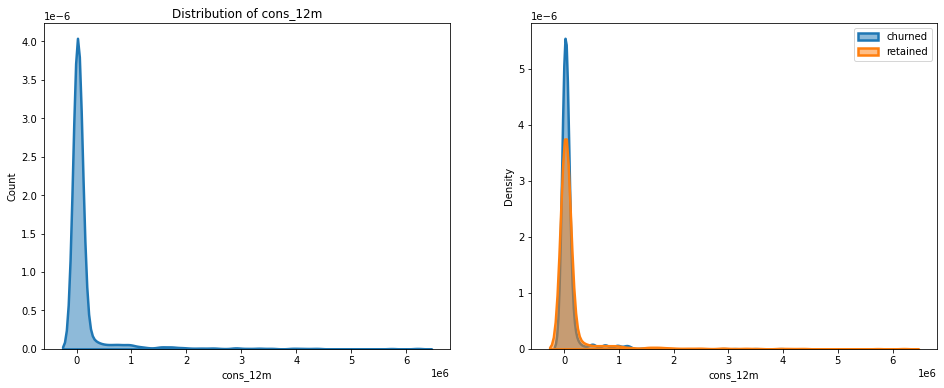

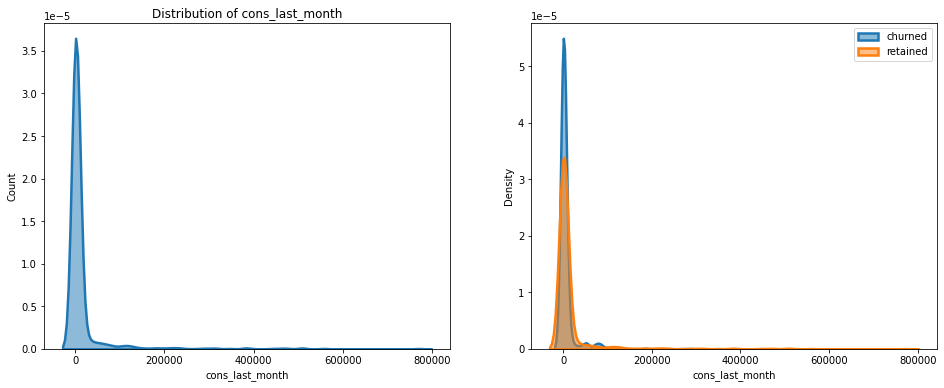

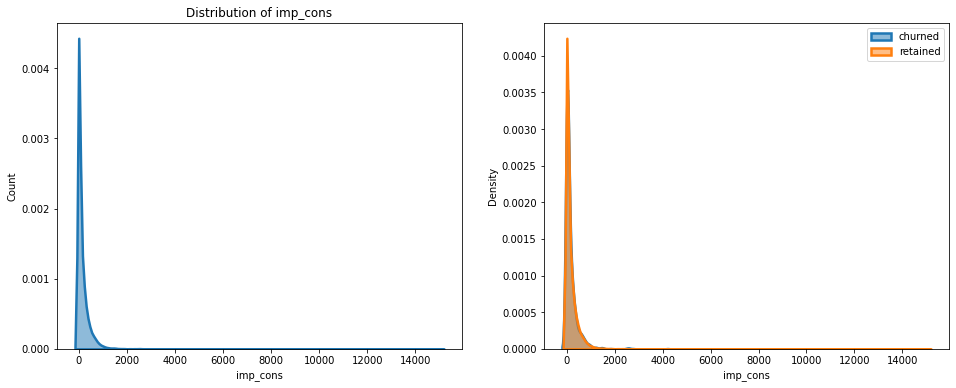

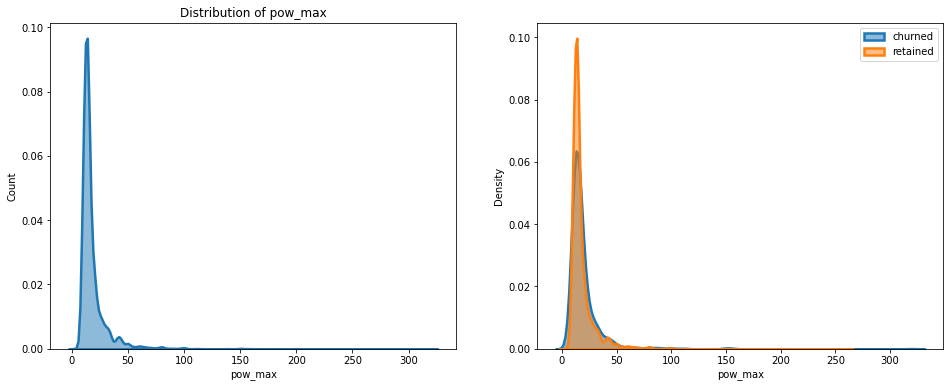

In [63]:
for i in dist_v:
  plotdistchurn(i)

<Axes: >

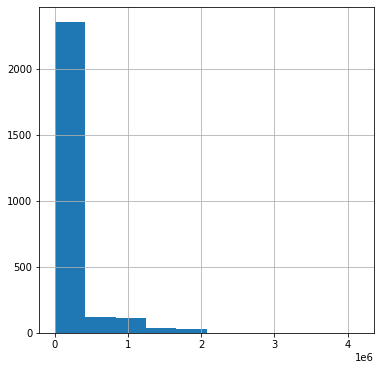

In [64]:
client[client['has_gas'] == 't']['cons_gas_12m'].hist(figsize=(6,6))

**The client consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution.**

<Axes: >

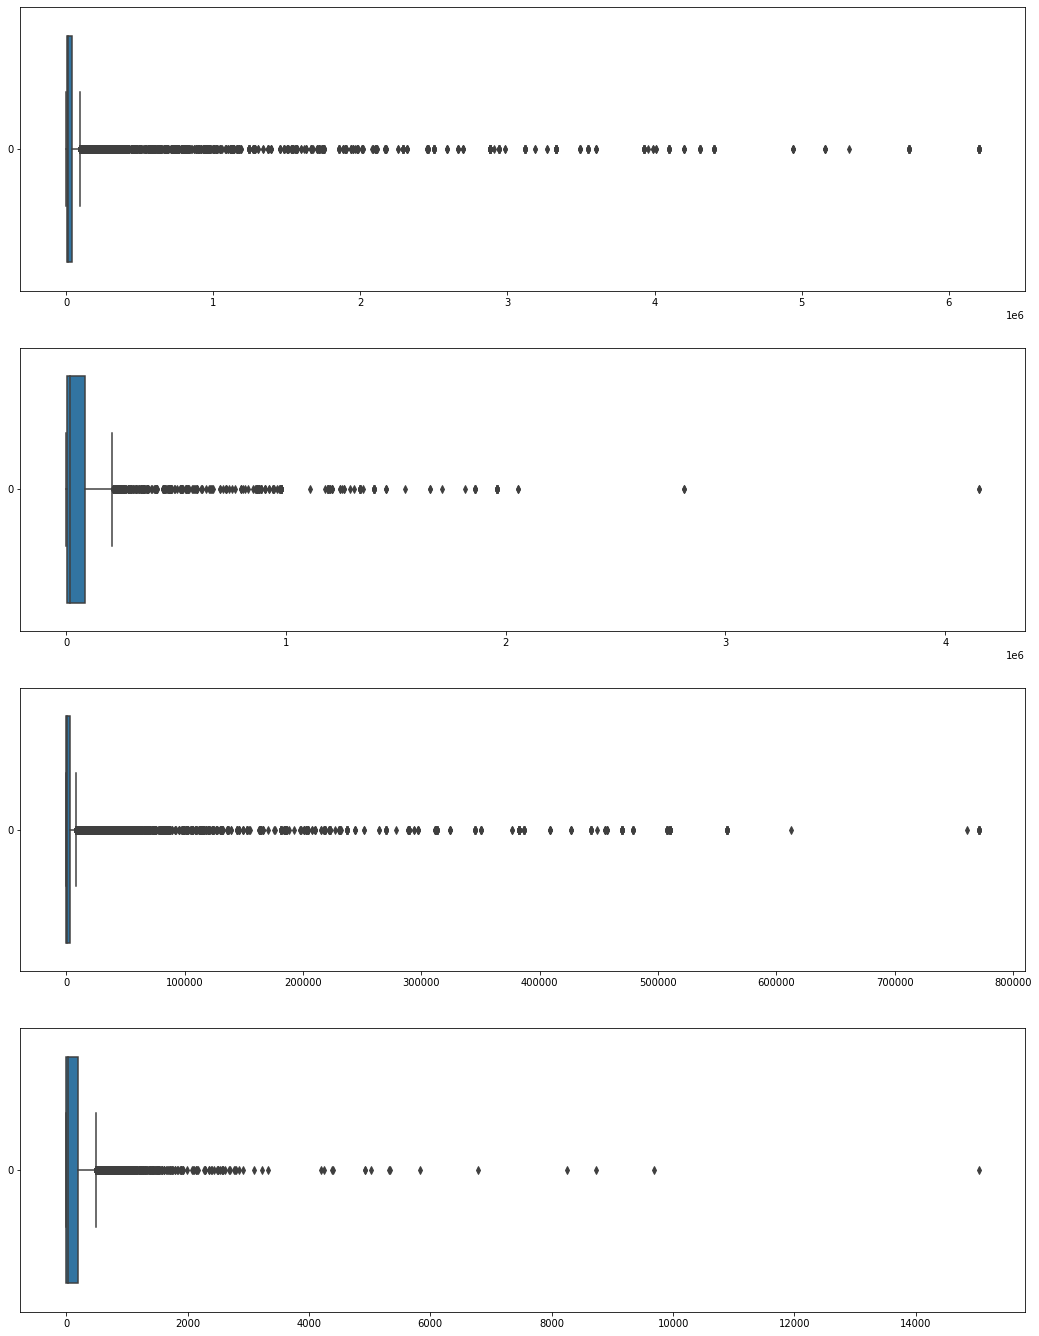

In [65]:
fig, ax = plt.subplots(nrows=4, figsize=(18,24))
# Plot histogram
sns.boxplot(client["cons_12m"], ax=ax[0], orient='h')
sns.boxplot(client[client["has_gas"] == "t"]["cons_gas_12m"],ax=ax[1], orient='h')
sns.boxplot(client["cons_last_month"], ax=ax[2], orient='h')
sns.boxplot(client["imp_cons"], ax=ax[3], orient='h')

**Margin**

<Axes: >

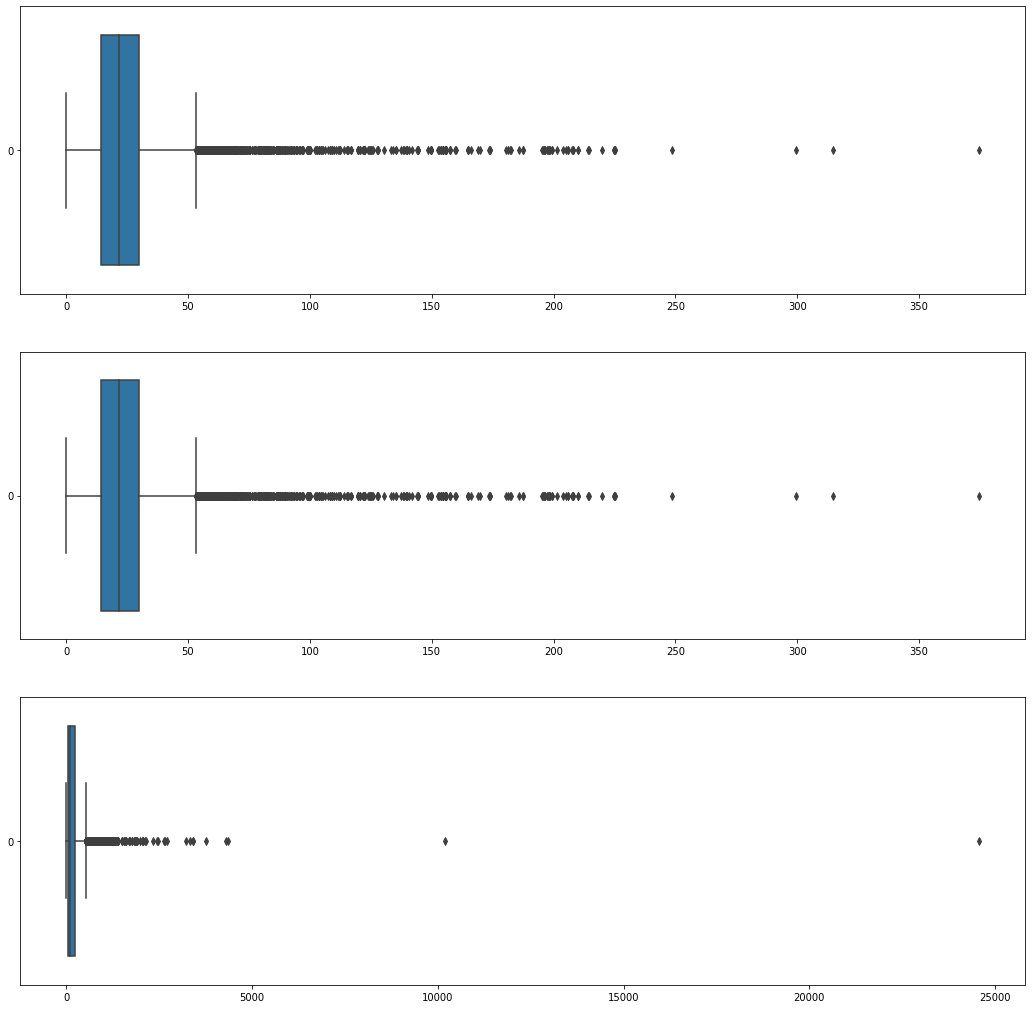

In [66]:
fig, ax = plt.subplots(nrows=3, figsize=(18,18))
# Plot histogram
sns.boxplot(client["margin_gross_pow_ele"], ax=ax[0], orient='h')
sns.boxplot(client["margin_net_pow_ele"], ax=ax[1], orient='h')
sns.boxplot(client["net_margin"], ax=ax[2], orient='h')

**We can see some outliers here as well which we will deal with in the next exercise.**

In [67]:
forcast = ["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy", "forecast_meter_rent_12m"]

None
None
None
None


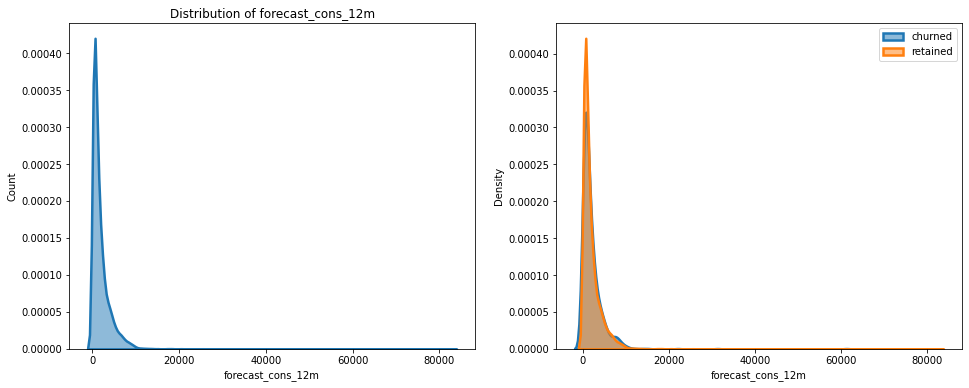

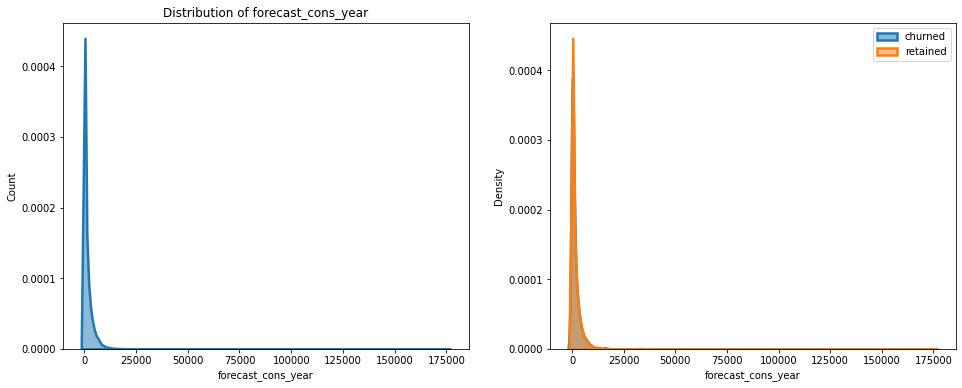

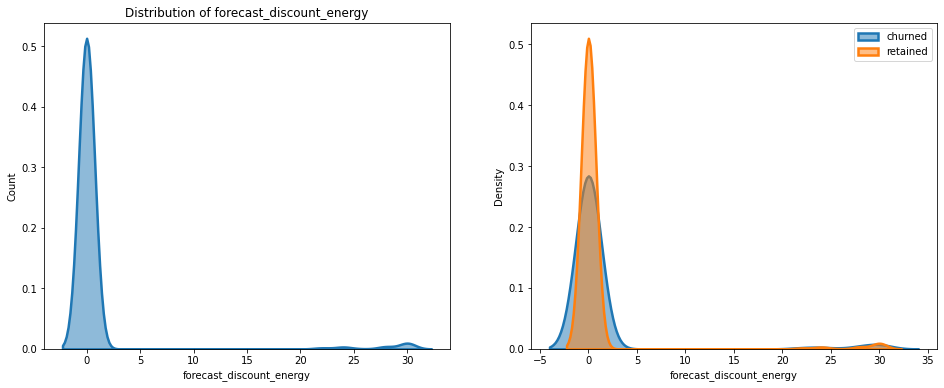

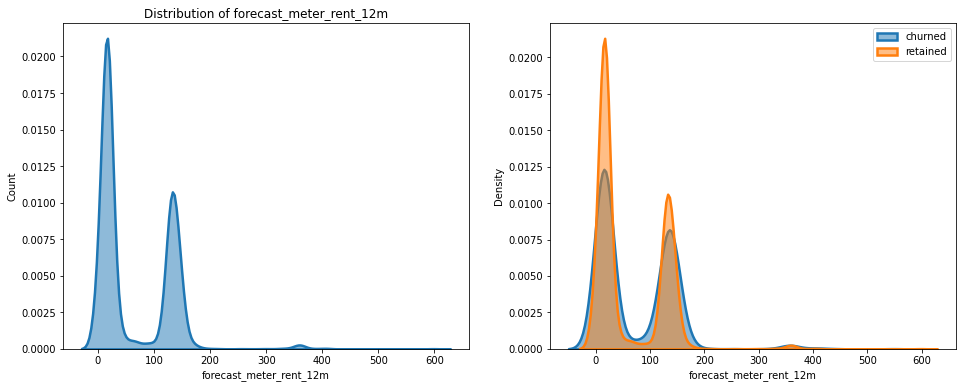

In [68]:
for i in forcast:
  print(plotdistchurn(i))

**Drop Outliers**

In [70]:
df = df.drop(df[(df['net_margin'] >= 5000.00)| (df['imp_cons'] >= 10000.00)| (df[df["has_gas"] == "t"]["cons_gas_12m"] >= 2500000.00)].index)

In [71]:
df.shape

(14599, 50)

In [72]:
monthly_price_by_id = price.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

jan_prices = monthly_price_by_id.groupby('id').first().reset_index() 
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1','price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'),on='id') 
diff['offpeak_diff_dec_january_energy'] = diff['dec_1']-diff['price_off_peak_var'] 
diff['offpeak_diff_dec_january_power'] = diff['dec_2']-diff['price_off_peak_fix'] 
diff = diff[['id','offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']] 
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [73]:
df = pd.merge(df, diff, on = "id",how='left')

In [74]:
df = df.drop(["id", "date_activ", "date_end","date_modif_prod","date_renewal"], axis = 1)

In [76]:
df = pd.get_dummies(df, drop_first = True)

In [77]:
corr_matrix = df.corr()
corr_with_churn = corr_matrix['churn'].sort_values(ascending=False)
print(corr_with_churn.head(6))
print(corr_with_churn.tail())

churn                                             1.000000
margin_net_pow_ele                                0.096456
margin_gross_pow_ele                              0.096409
origin_up_lxidpiddsbxsbosboudacockeimpuepw        0.094065
channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    0.075885
min_peak_price                                    0.047178
Name: churn, dtype: float64
cons_12m                                         -0.046047
channel_sales_lmkebamcaaclubfxadlmueccxoimlema   -0.052938
contract_duration                                -0.073751
num_years_antig                                  -0.073898
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws       -0.080753
Name: churn, dtype: float64


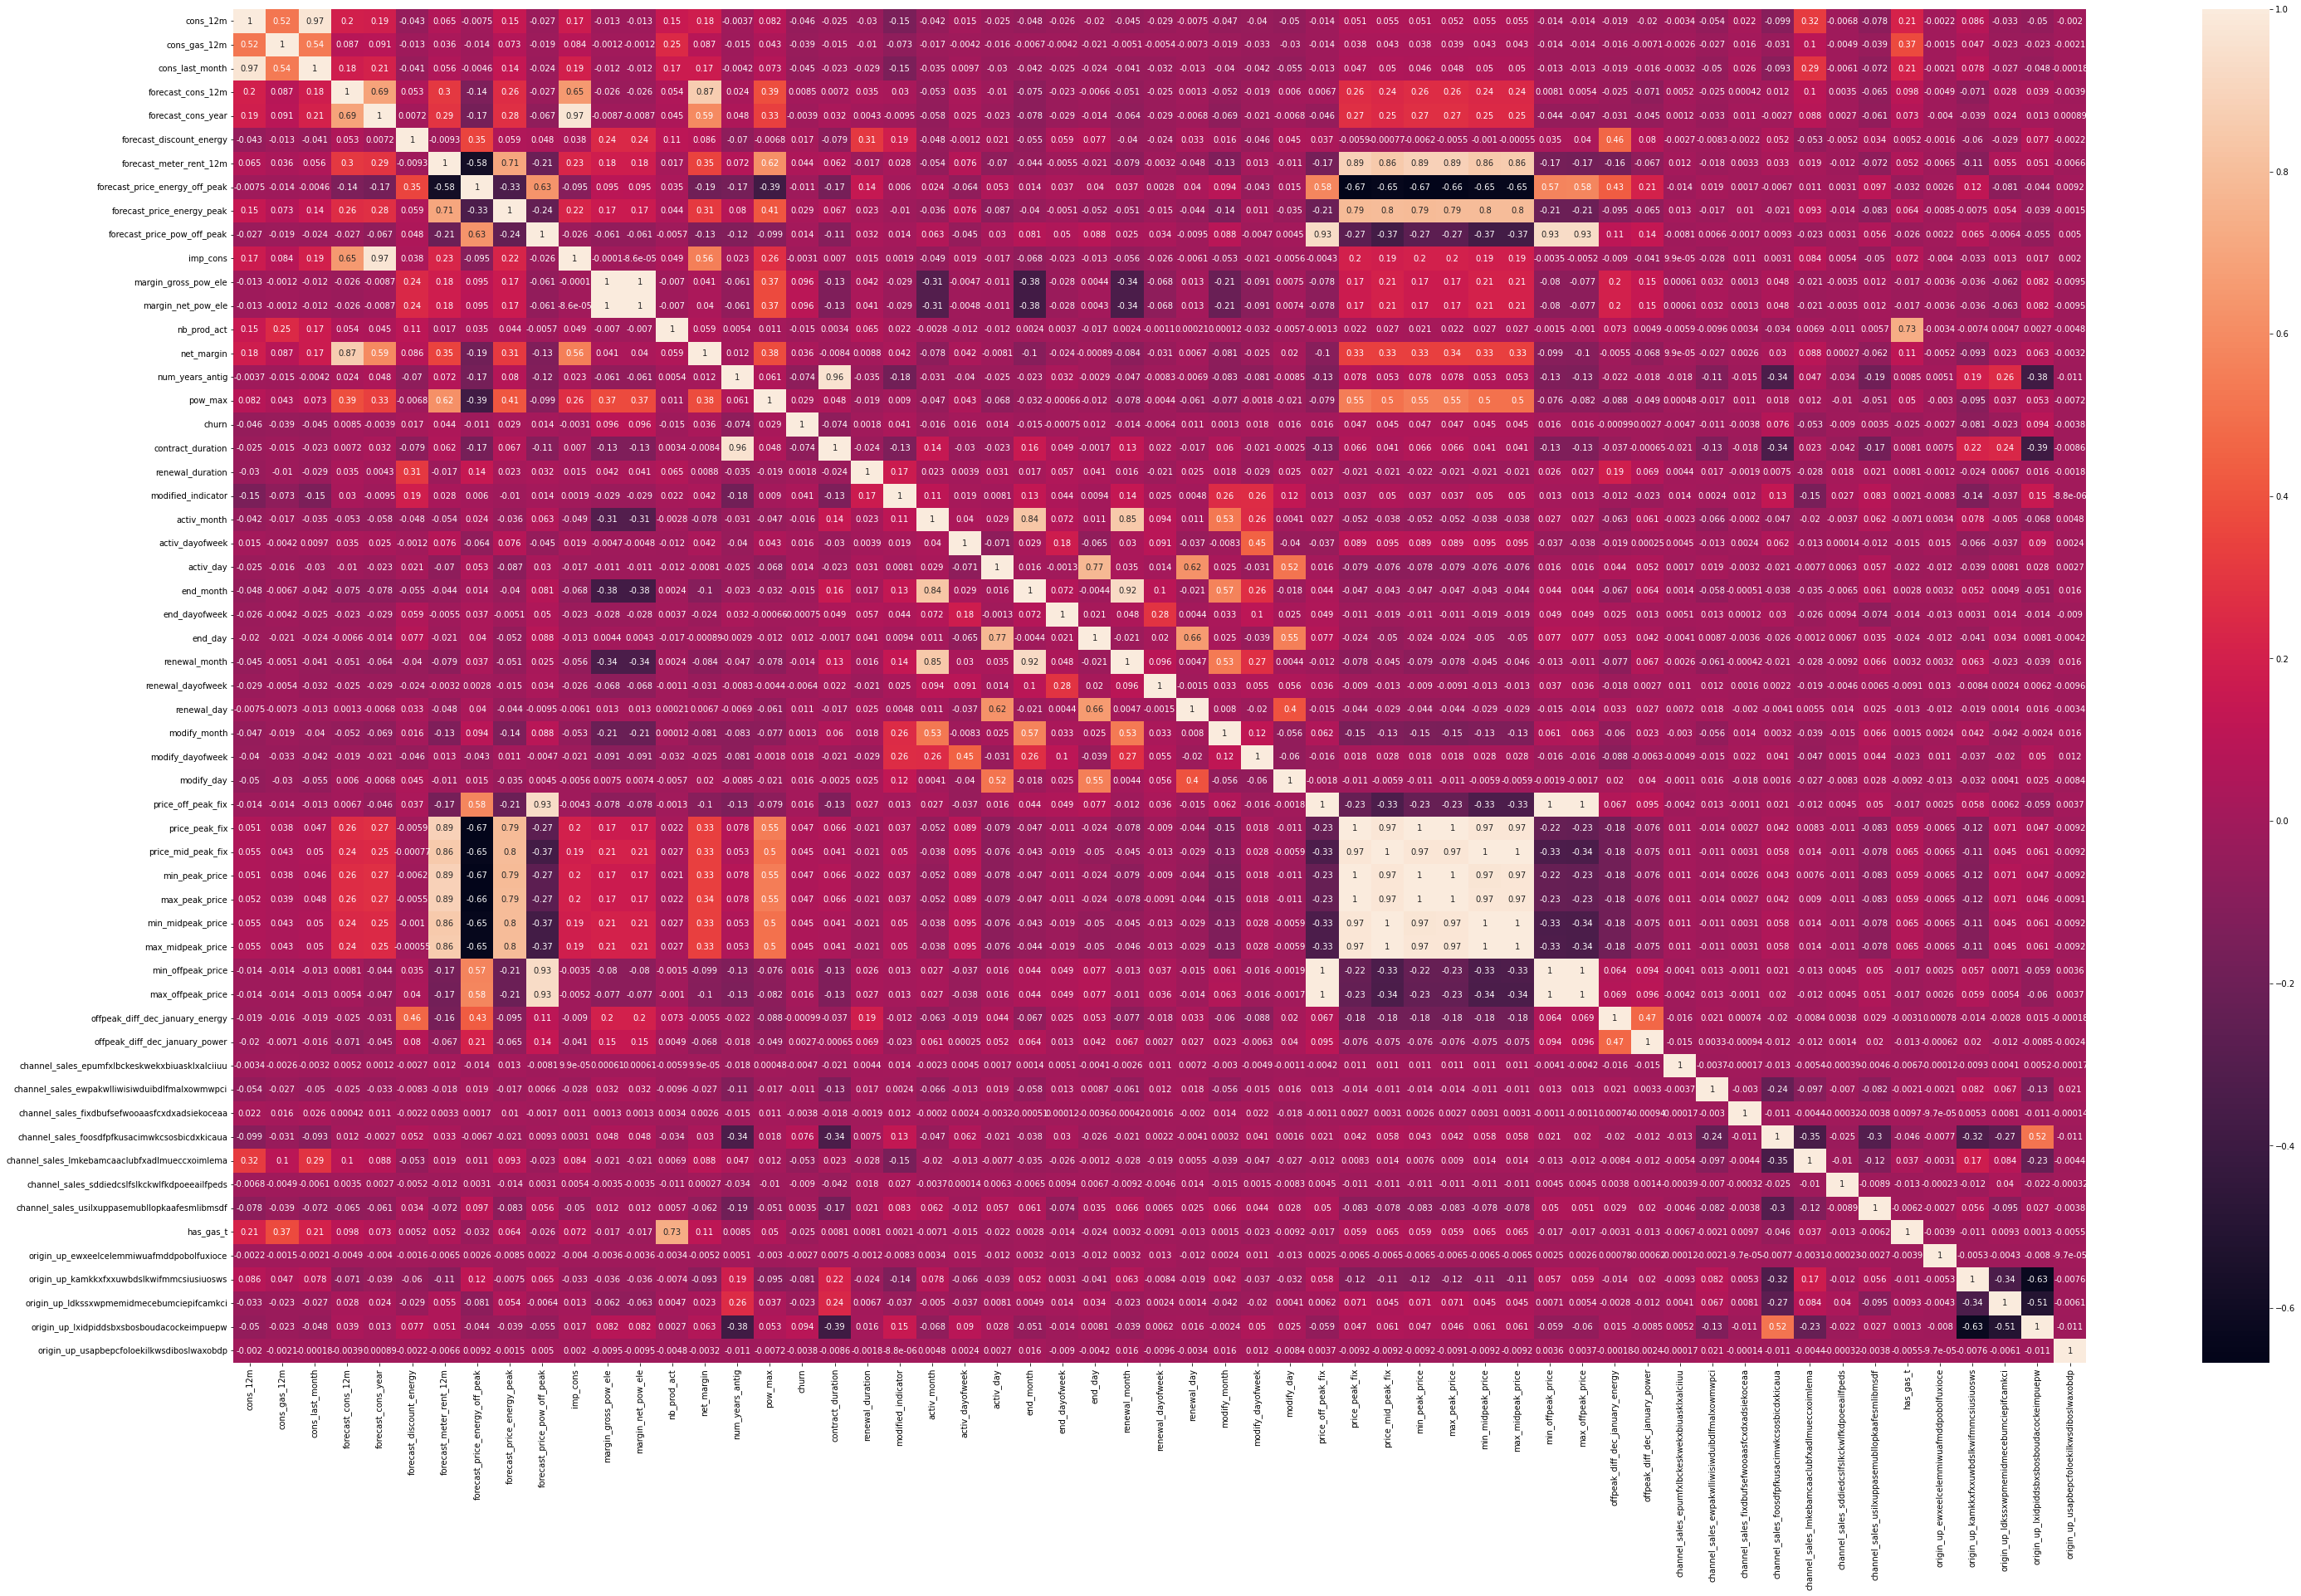

In [78]:
fig, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(corr_matrix, ax=ax, annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 3600x360 with 0 Axes>

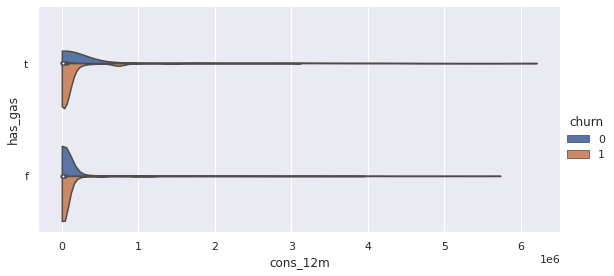

In [79]:
plt.figure(figsize=(50,5))
sns.set(rc={'figure.figsize':(50,5)})
sns.catplot(
    data=client, x="cons_12m", y="has_gas", hue="churn",
    kind="violin", bw=.25, cut=0, split=True, height=4, aspect=2
)
plt.show

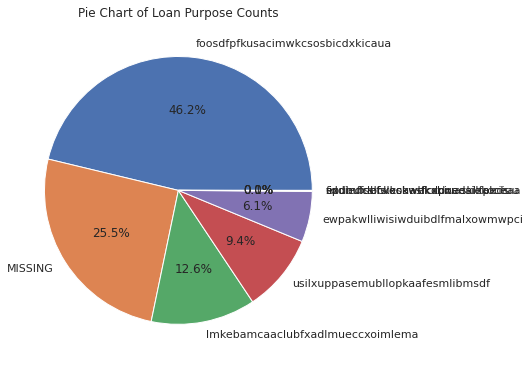

In [80]:
counts = client['channel_sales'].value_counts()
percentages = 100 * counts / len(client)

# Create a pie chart using Seaborn and DataFrame
sns.set_style("whitegrid")
plt.figure(figsize=(6,8))
plt.pie(percentages, labels=counts.index, autopct='%1.1f%%')
plt.title("Pie Chart of Loan Purpose Counts")
plt.show()

We will deal with skewness and outliers during feature engineering in the next exercise.

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, '')]

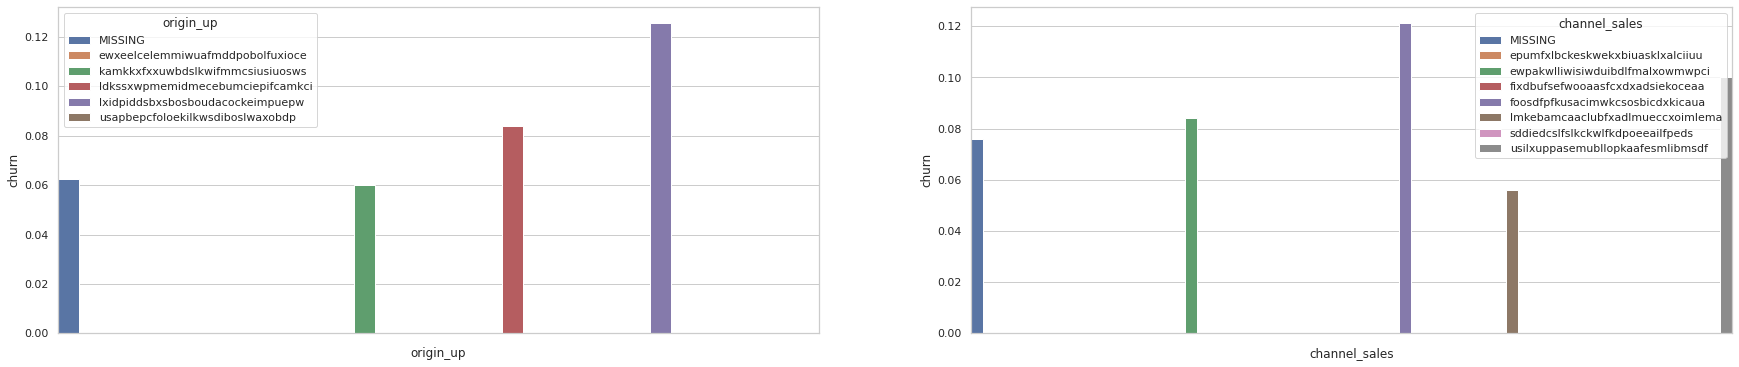

In [81]:
df_origin = client.groupby(['origin_up'])['churn'].mean().reset_index()
df_channel = client.groupby(['channel_sales'])['churn'].mean().reset_index()

fig, ax = plt.subplots(1,2, figsize=(30,6))

sns.barplot(x = df_origin["origin_up"], y = df_origin["churn"], hue= df_origin["origin_up"], ax= ax[0], width=1)
ax[0].set_xticklabels([])
sns.barplot(x=df_channel["channel_sales"],y=df_channel["churn"], hue=df_channel["channel_sales"], ax= ax[1], width=1)
ax[1].set_xticklabels([])

**Date_churn**

<Axes: xlabel='end_month', ylabel='churn'>

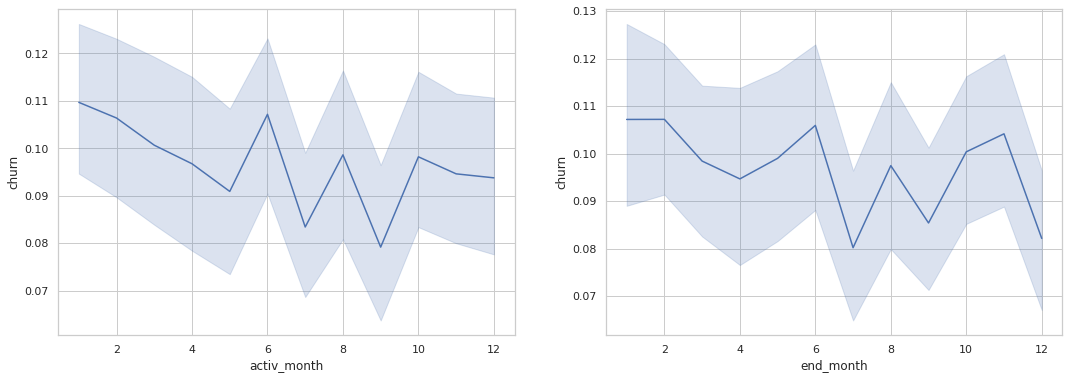

In [82]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
sns.lineplot(data=df, x="activ_month", y="churn",ax=ax[0])
sns.lineplot(data=df, x="end_month", y="churn",ax=ax[1])


<Axes: xlabel='modified_indicator', ylabel='churn'>

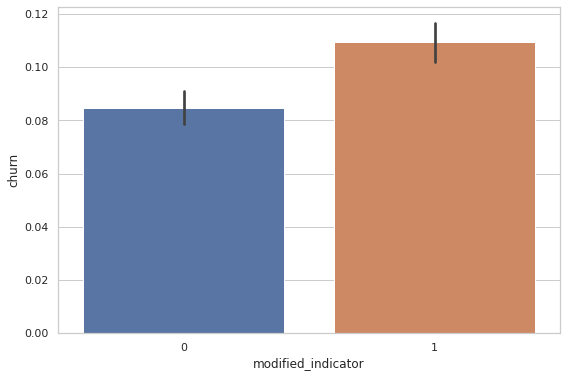

In [83]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.barplot(data=df, x="modified_indicator", y="churn",ax=ax)

<Axes: xlabel='churn', ylabel='price_off_peak_fix'>

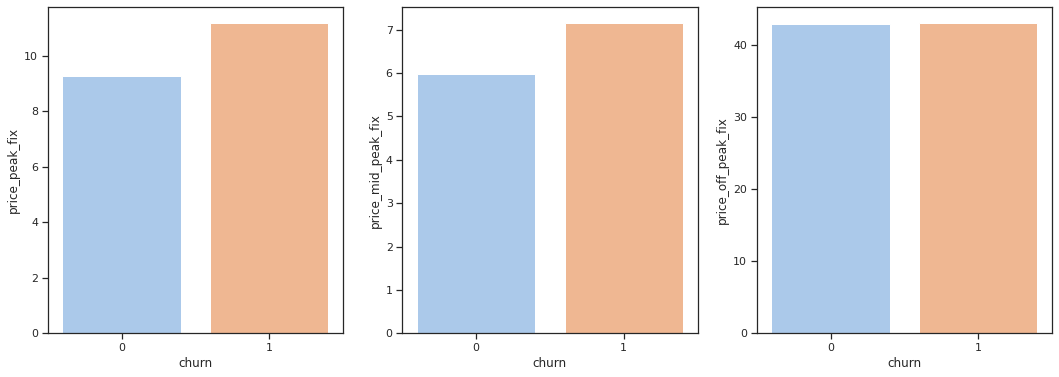

In [84]:
sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(1,3, figsize=(18,6))
groupby_churn_p = df.groupby("churn")["price_peak_fix"].mean().reset_index()
groupby_churn_mp = df.groupby("churn")["price_mid_peak_fix"].mean().reset_index()
groupby_churn_op = df.groupby("churn")["price_off_peak_fix"].mean().reset_index()

sns.barplot(x = groupby_churn_p["churn"], y = groupby_churn_p["price_peak_fix"], ax= ax[0])
sns.barplot(x = groupby_churn_mp["churn"], y = groupby_churn_mp["price_mid_peak_fix"], ax= ax[1])
sns.barplot(x = groupby_churn_op["churn"], y = groupby_churn_op["price_off_peak_fix"], ax= ax[2])

<Axes: xlabel='churn', ylabel='num_years_antig'>

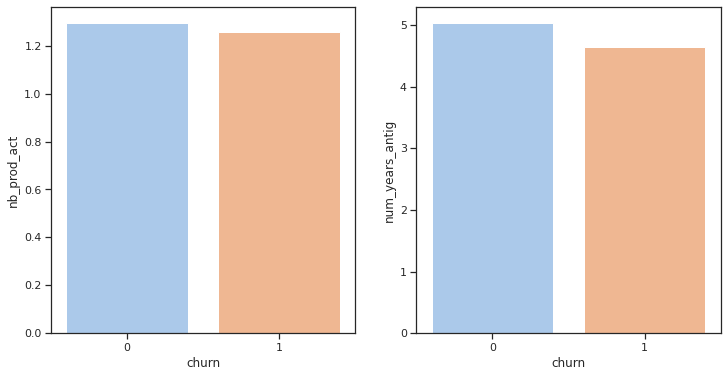

In [85]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
groupby_churn_prod = df.groupby("churn")["nb_prod_act"].mean().reset_index()
groupby_churn_years = df.groupby("churn")["num_years_antig"].mean().reset_index()
sns.barplot(data=groupby_churn_prod, x="churn", y="nb_prod_act",ax=ax[0])
sns.barplot(data=groupby_churn_years, x="churn", y="num_years_antig",ax=ax[1])

<Axes: xlabel='modified_indicator', ylabel='cons_12m'>

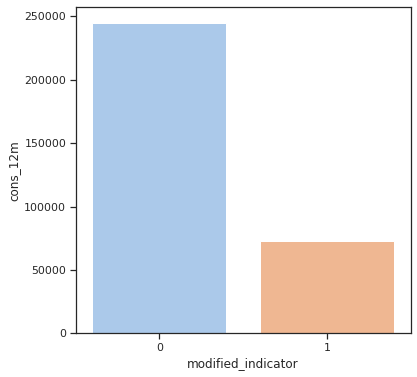

In [86]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
groupby_churn_prod = df.groupby("modified_indicator")["cons_12m"].mean().reset_index()
sns.barplot(data=groupby_churn_prod, x="modified_indicator", y="cons_12m",ax=ax)

In [87]:
df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas_t,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,1,0,0,0,1,0,0,0,1,0
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,0,0,0,0,0,0,1,0,0,0
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,1,0,0,0,0,0,1,0,0,0
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,0,1,0,0,0,0,1,0,0,0
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,...,0,0,0,0,0,0,1,0,0,0


## Modeling


In [89]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [90]:
y = df["churn"]
X = df.drop(["churn"], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=123)

In [91]:
sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [92]:
# Random Forest
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


param_grid = {'max_depth': range(10,20,5),
              'n_estimators':range(30,50,5)}


rf = RandomForestClassifier(criterion='entropy', random_state=123)
rf = HalvingGridSearchCV(rf, param_grid, cv=5, scoring = "recall").fit(X_train_res,y_train_res)
RF = rf.best_estimator_

accuracy = cross_val_score(RF, X_train_res, y_train_res, cv=5, scoring="accuracy")

print('Accuracy: %.3f' % accuracy.mean())
print(rf.best_score_, rf.best_params_) 

Accuracy: 0.936
0.8942935039563343 {'max_depth': 15, 'n_estimators': 35}


                                         Attribute  Importance
42                  offpeak_diff_dec_january_power    0.044477
52      origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0.042077
8                       forecast_price_energy_peak    0.040173
9                      forecast_price_pow_off_peak    0.033613
32                              price_off_peak_fix    0.032185
36                                  max_peak_price    0.032002
35                                  min_peak_price    0.031759
53      origin_up_ldkssxwpmemidmecebumciepifcamkci    0.031513
16                                         pow_max    0.031393
34                              price_mid_peak_fix    0.030874
12                              margin_net_pow_ele    0.028948
7                   forecast_price_energy_off_peak    0.027988
0                                         cons_12m    0.027768
39                               min_offpeak_price    0.026711
17                               contract_duration    0

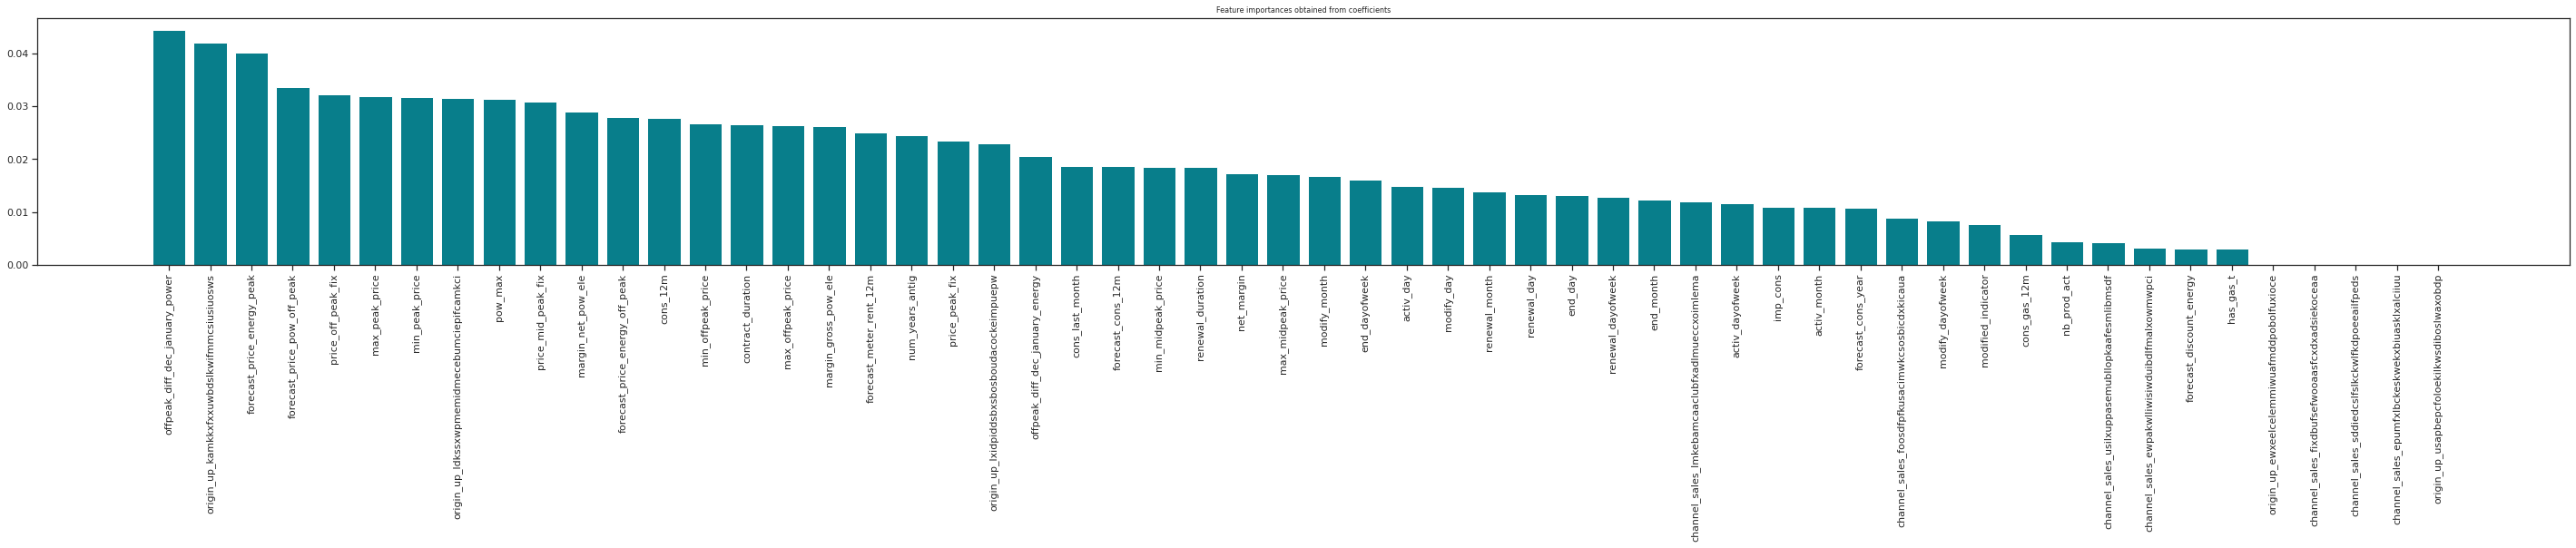

In [93]:
importances = RF.feature_importances_

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': RF.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=8)
plt.rcParams["figure.figsize"] = (15,10)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
from sklearn.metrics import classification_report

y_pred = RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2669
           1       0.39      0.13      0.20       251

    accuracy                           0.91      2920
   macro avg       0.66      0.56      0.57      2920
weighted avg       0.88      0.91      0.89      2920



Accuracy: 0.908
[[2617   52]
 [ 218   33]]
Precision: 0.388
Recall: 0.131


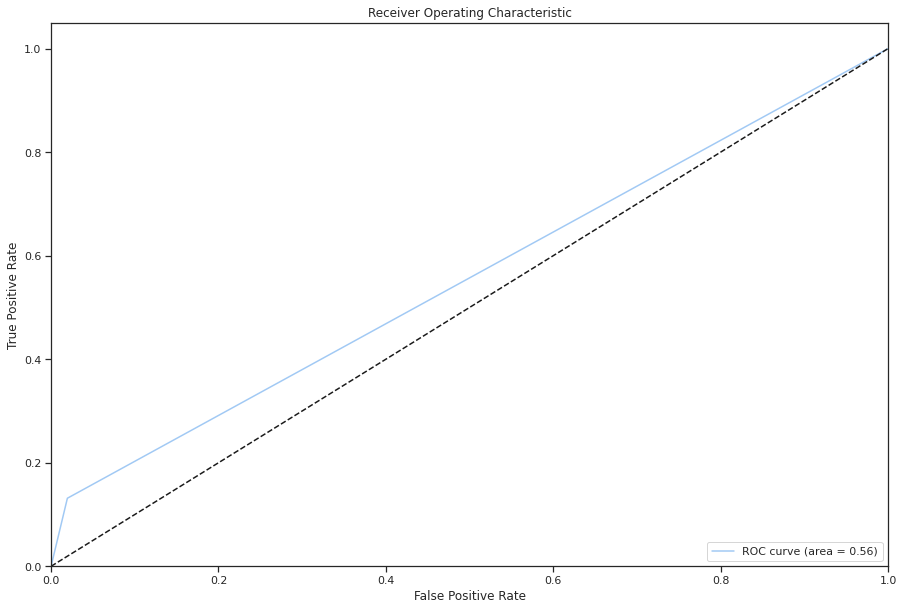

In [98]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc

rf_pred = RF.predict(X_test)

score = RF.score(X_test, y_test)
print('Accuracy: %.3f' % score)

cm = metrics.confusion_matrix(y_test, rf_pred)
print(cm)	

print('Precision: %.3f' % precision_score(y_test, rf_pred))
print('Recall: %.3f' % recall_score(y_test, rf_pred))

fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Recall is only 0.13 and Precision is 0.4 which means that the model is performing well in predicting the majority class, but it is not performing well in predicting the minority class. This is a common problem in imbalanced datasets, where one class has significantly more instances than the other(s).

In this scenario, the model is making many false negative errors (low recall) and also many false positive errors (low precision) when predicting the minority class. This indicates that the model is not effectively capturing the characteristics of the minority class, and may be biased towards the majority class.